In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2025-01-20 21:50:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252, 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip.2’

bank-additional.zip     [  <=>               ] 434.15K  1.13MB/s    in 0.4s    

2025-01-20 21:50:18 (1.13 MB/s) - ‘bank-additional.zip.2’ saved [444572]



In [2]:
!unzip -o -q bank-additional.zip

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [4]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [6]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.shape

(41188, 21)

<AxesSubplot:>

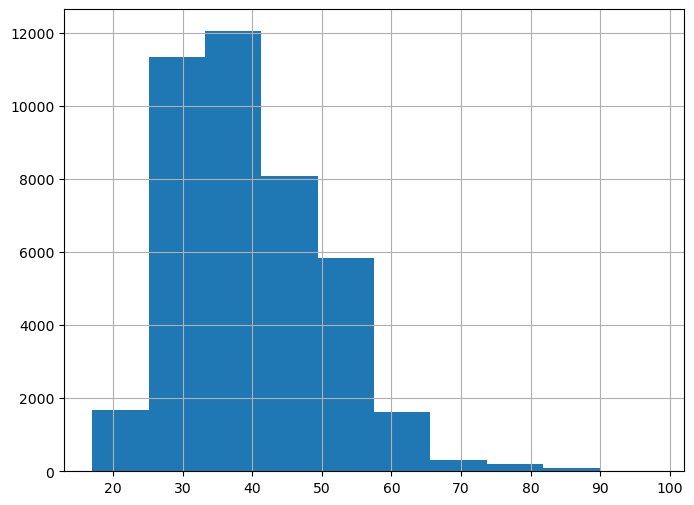

In [9]:
# The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population
df["age"].hist()

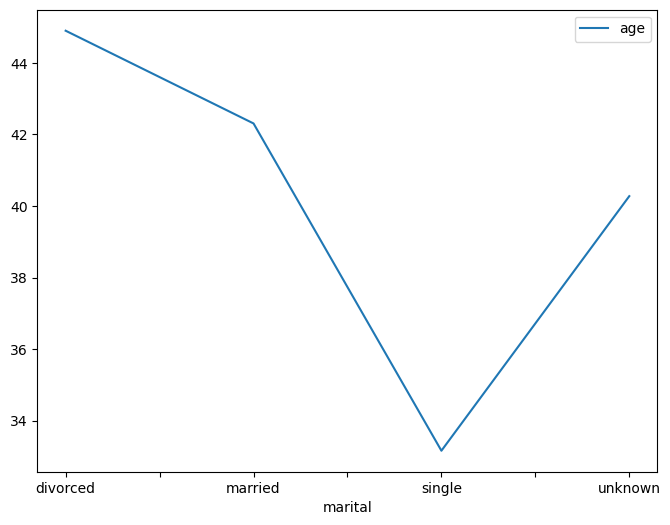

In [10]:
# We will build a graph of the average client age depending on the marital status
df[["age", "marital"]].groupby(
    "marital"
).mean().plot();

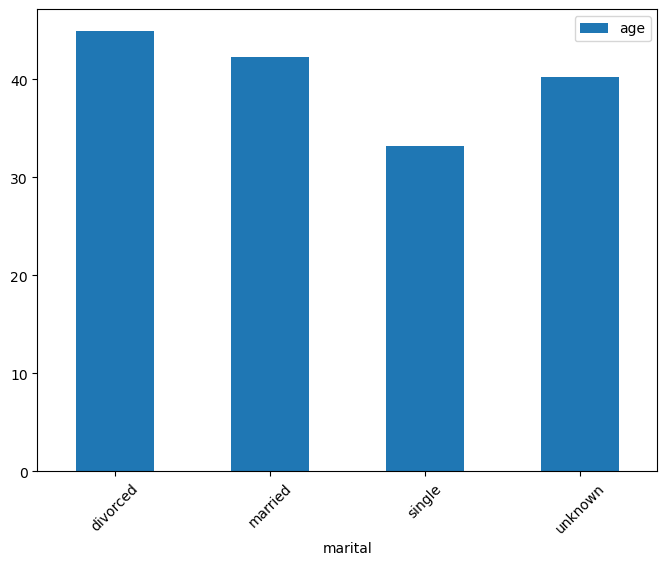

In [11]:
# With the "kind" parameter you can change the plot type
df[["age", "marital"]].groupby(
    "marital"
).mean().plot(kind="bar", rot=45);

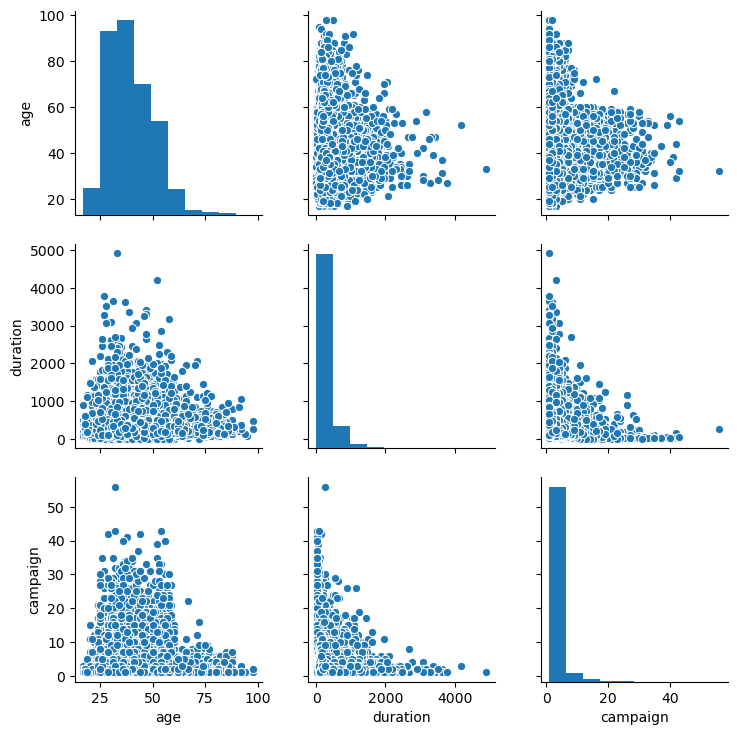

In [12]:
# Seaborn - This visualization will help us to look at one picture as at interconnection of various features.
sns.pairplot(
    df[["age", "duration", "campaign"]]
);

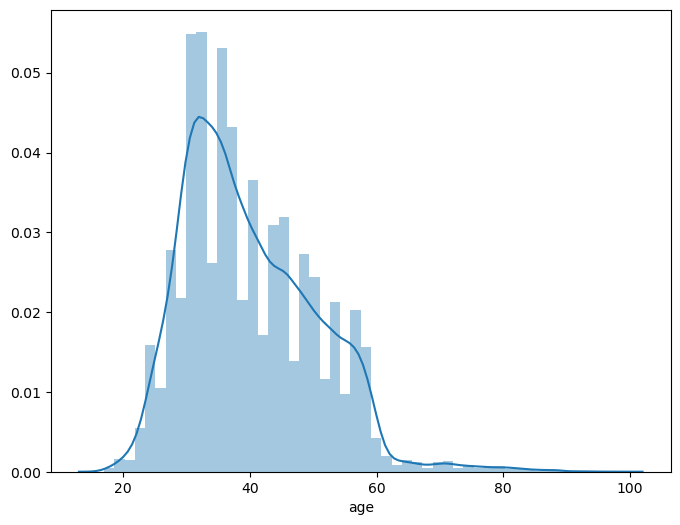

In [13]:
# Seaborn - The distribution of the client age, build "distplot"
sns.distplot(df.age);

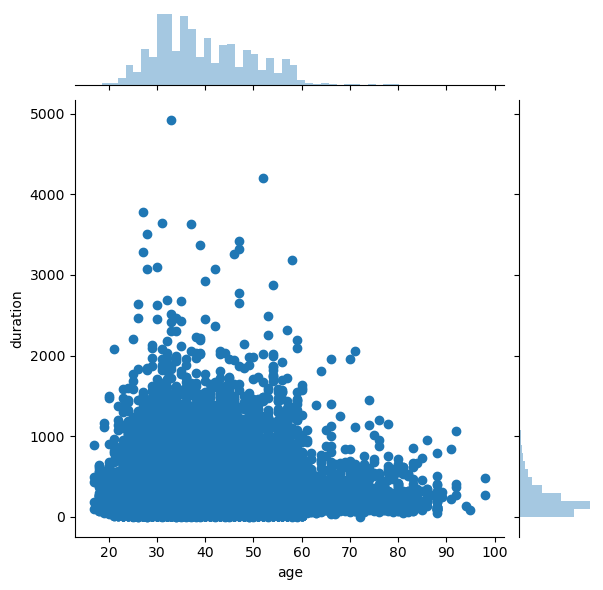

In [14]:
# In order to look more for the relationship between two numerical features, use "joint_plot"
sns.jointplot(x="age", y="duration", data = df, kind="scatter")

<AxesSubplot:xlabel='age', ylabel='job'>

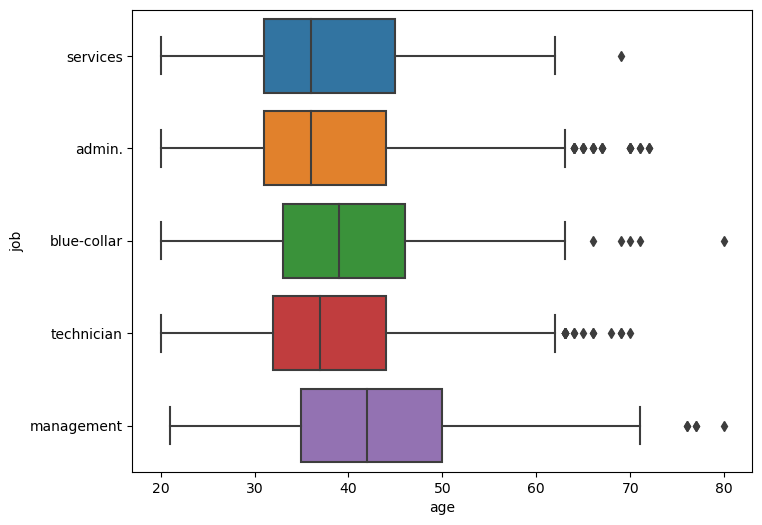

In [15]:
# Seaborn - plot type is Box Plot ("Box and whisker plot"). Compare the age of customers for the top 5 of the most common employment forms.
top_jobs = (df.job.value_counts().sort_values(ascending=False).head(5).index.values)
sns.boxplot(y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h")

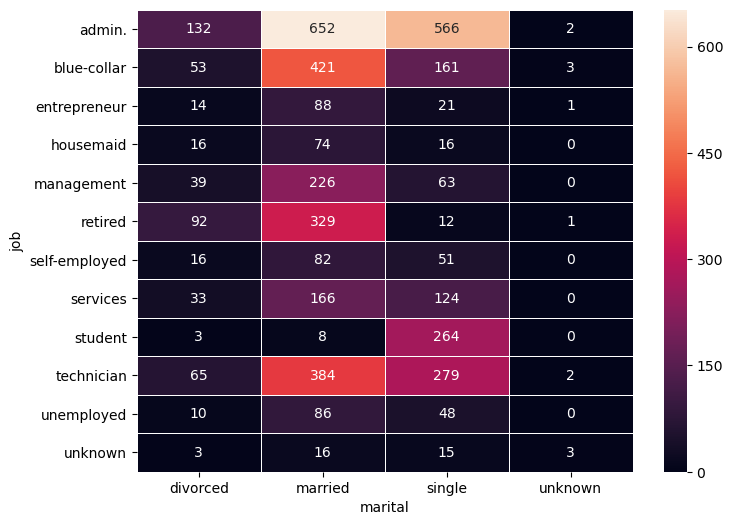

In [16]:
# A "heat map". A Heat Map allows you to look at the distribution of some numerical feature in two categories.
job_marital_y = (df.pivot_table(index="job", columns="marital", values="y", aggfunc=sum))
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5);

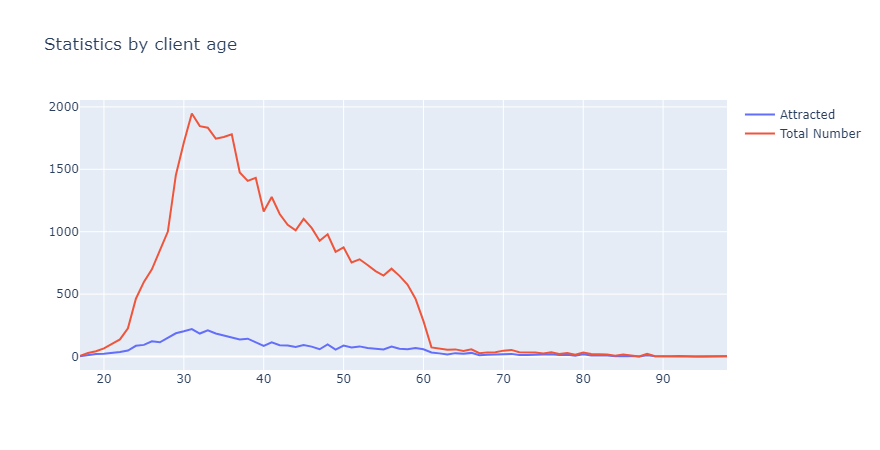

In [17]:
# "PLOTLY" is an open-source library that allows you to build interactive graphics in a jupyter notebook
# The beauty of interactive graphs is that you can see the exact numerical value on mouse hover, hide the uninteresting rows in the visualization, zoom in a certain area of ​​graphics, etc.
# We build "Line Plot" with the distribution of the total number and the number of attracted clients by age.
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [18]:
# "Bar Chart" distribution of customers by months, designed by the number of attracted clients and on the total number of clients.
month_index = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_df = (
    df.groupby("month")[["y"]]
    .sum()
    .join(df.groupby("month")[["y"]].count(), rsuffix='_count')
).reindex(month_index)
month_df.columns = ["Attracted", "Total Number"]

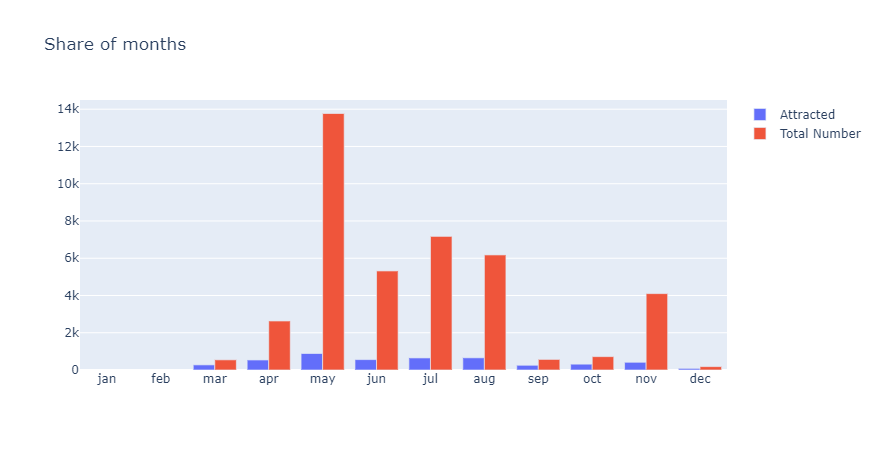

In [19]:
trace0 = go.Bar(x=month_df.index, y=month_df["Attracted"], name="Attracted")
trace1 = go.Bar(x=month_df.index, y=month_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Share of months"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

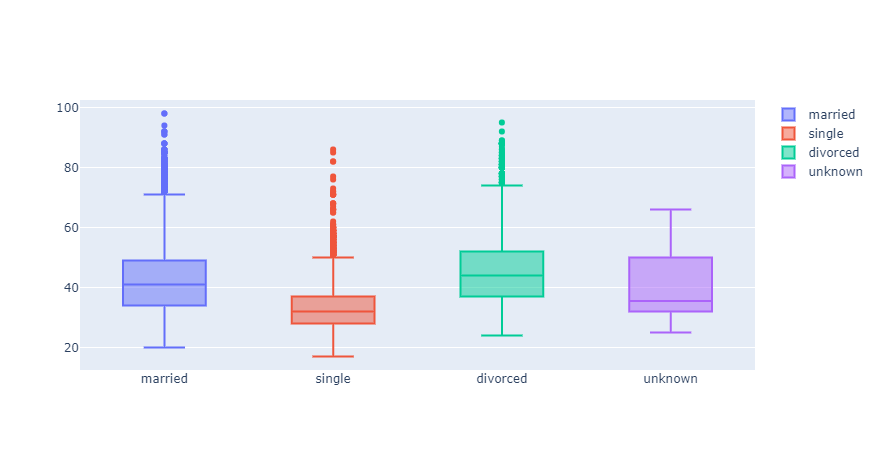

In [20]:
# pLOTLY - Box plot. Consider the differences in the client age depending on the family status.
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)

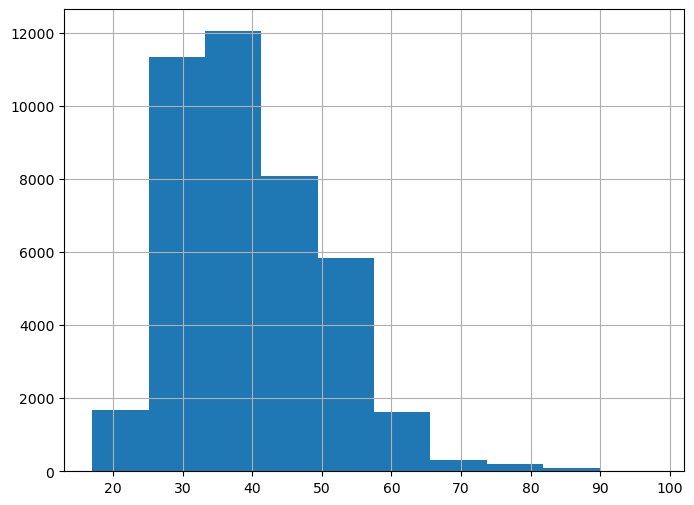

In [21]:
# "Visual Analysis of Single Features"
# Numerical features - For the analysis of numerical features, a histogram and a box plot are most often used.
df["age"].hist();

<AxesSubplot:xlabel='cons.price.idx'>

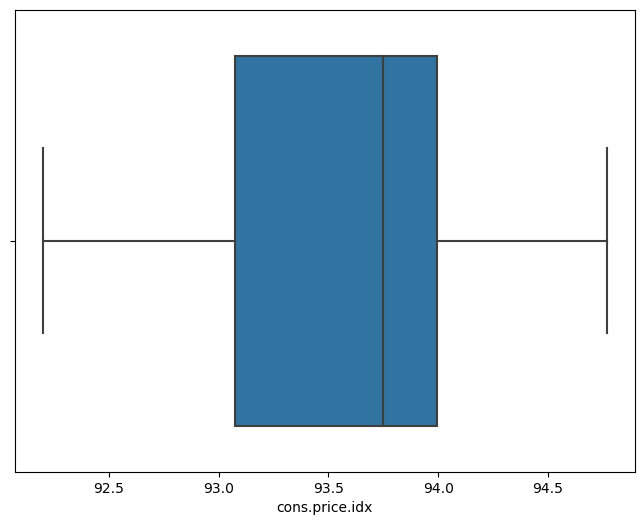

In [22]:
# To build a "Box Plot" for the 'cons.price.idx' feature with 'sns.boxplot' function.
sns.boxplot(df["cons.price.idx"])

In [23]:
# "Categorical features" - Use the countplot graphics for effective analysis of categorical features.
df["marital"].value_counts().head()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [24]:
# To calculate the client distribution on the fact of their involvement for signing a deposit as well.
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<AxesSubplot:xlabel='marital', ylabel='count'>

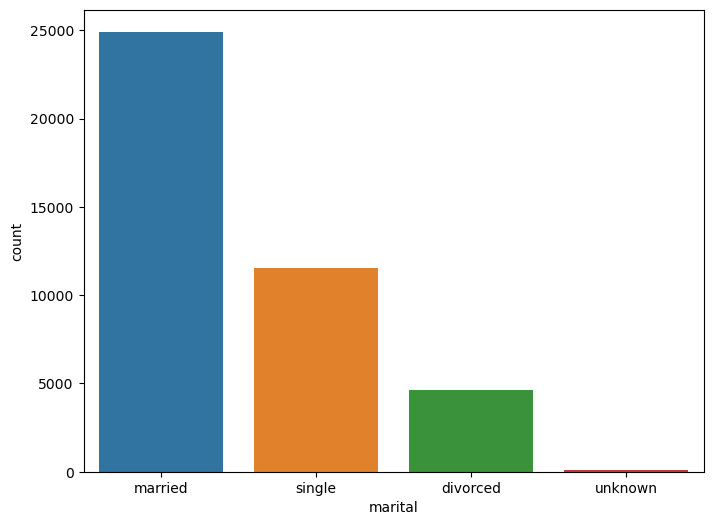

In [26]:
# To present this information graphically.
sns.countplot(df["marital"])

[None, None, None, None, None, None, None, None, None, None]

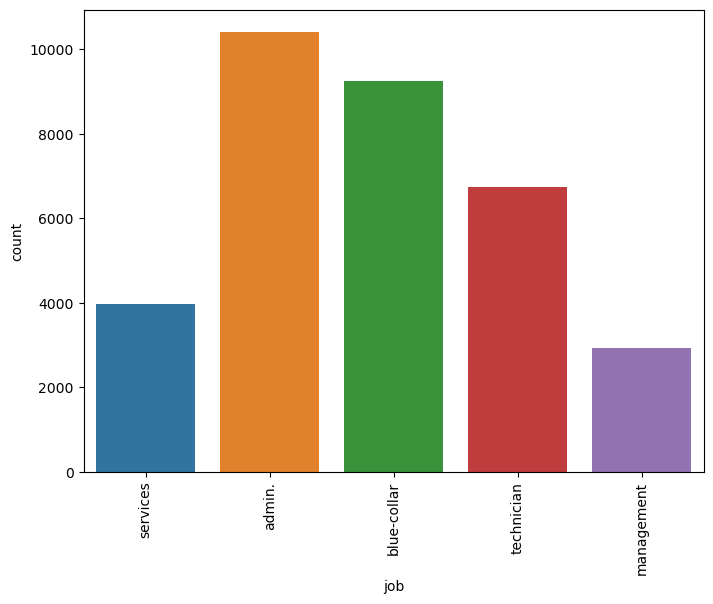

In [27]:
# To Plot the graphical client distribution by the 5 most common types of employment.
plot = sns.countplot(df[df["job"].isin(df["job"].value_counts().head(5).index)]["job"])
plt.setp(plot.get_xticklabels(), rotation=90)

array([[<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>]], dtype=object)

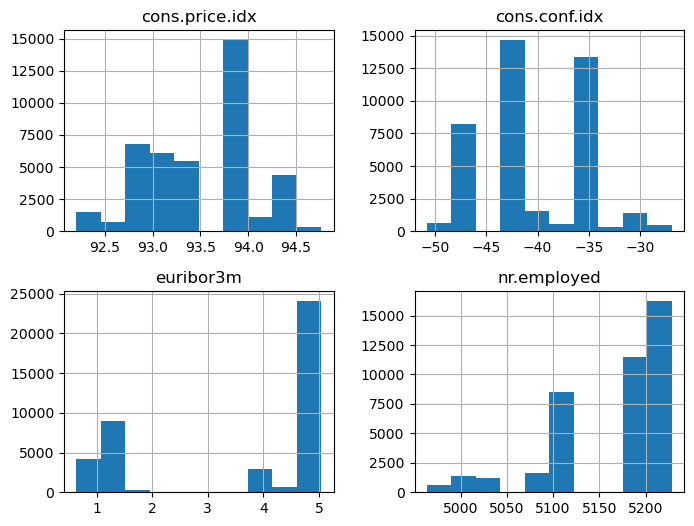

In [28]:
# "Visual Analysis of the Feature Interaction"
# 'Numerical features'-To analyze the interaction of numerical features, use Histogram, Pairplot and HeatMap plot functions.
# We visualize the values of the economy macro indicators from the dataset.
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
df[feat].hist()

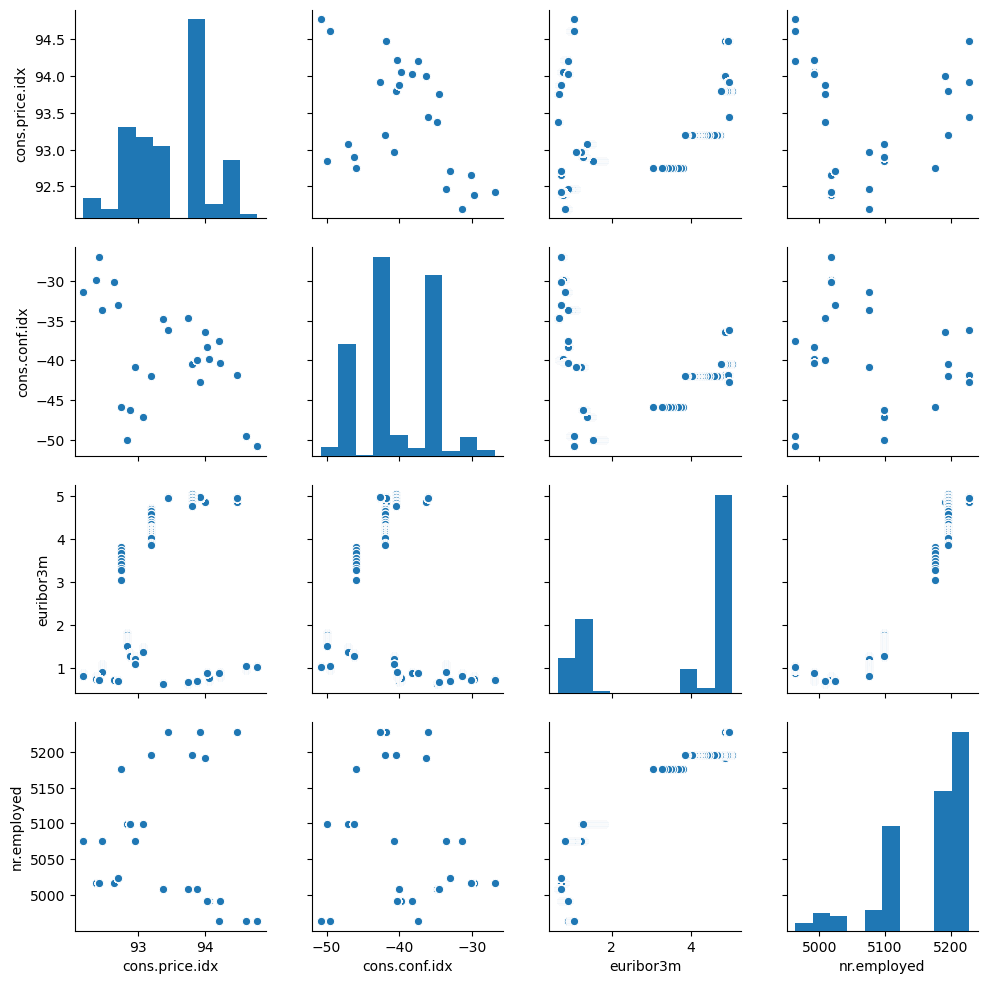

In [29]:
# Build a pair plot set for the feat list with sns.pairplot function.
sns.pairplot(df[feat])

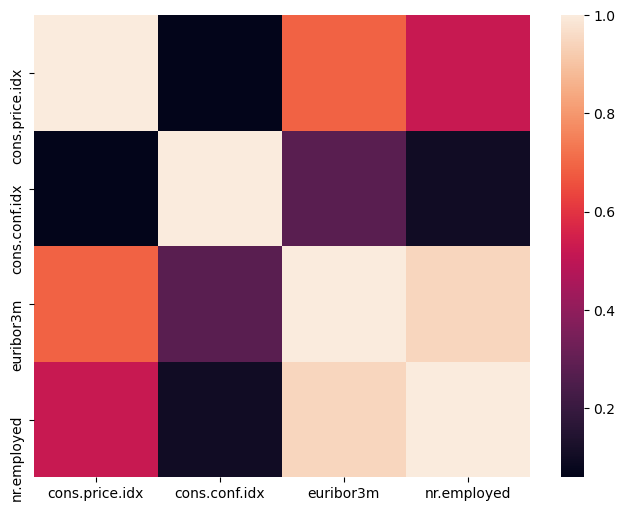

In [30]:
# Build a Heat Map for the economy macro indicators correlation matrix.
sns.heatmap(df[feat].corr());
# We saw a strong interaction between the euribor3m and nr.employed features.

<AxesSubplot:xlabel='marital', ylabel='age'>

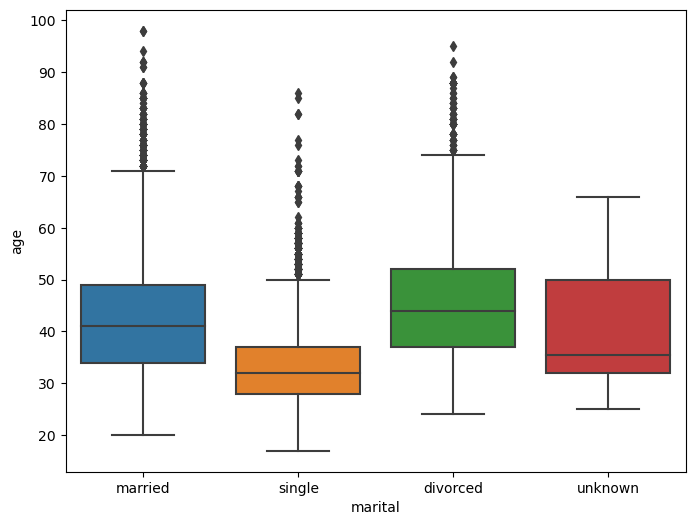

In [31]:
# "Numerical and Categorical Features"
# 'Box Plot' and 'Violin Plot' are used for visual analysis of the numerical and categorical features.
# Let's look at the "age" feature box plot by the "marital" feature.
sns.boxplot(x="marital", y="age", data=df)

<AxesSubplot:xlabel='marital', ylabel='age'>

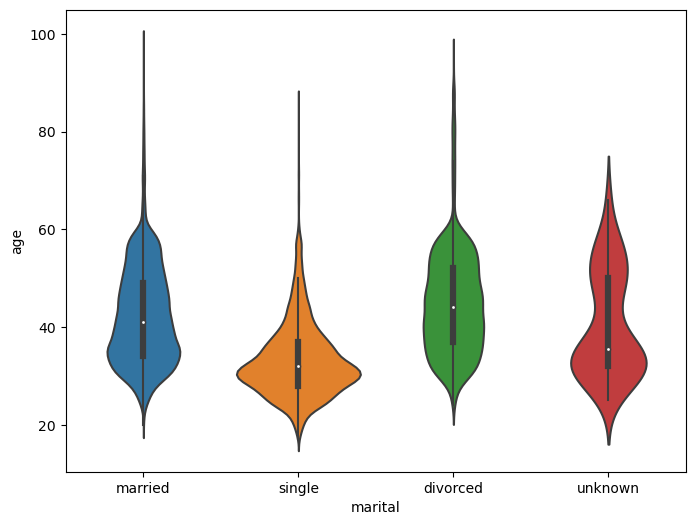

In [32]:
# To draw a combination of "Boxplot" and "Kernel density estimate" with a Violin Plot" function
# It shows the distribution of Quantitative data across several levels of one (or more) categorical variables
sns.violinplot(x="marital", y="age", data=df)

In [33]:
# It is useful to combine grouping with a "Boxplot". Calculate the mean client for the grouping by the housing feature values.
df.groupby("housing")["age"].mean()

housing
no        40.04
unknown   39.95
yes       40.01
Name: age, dtype: float64

<AxesSubplot:xlabel='housing', ylabel='age'>

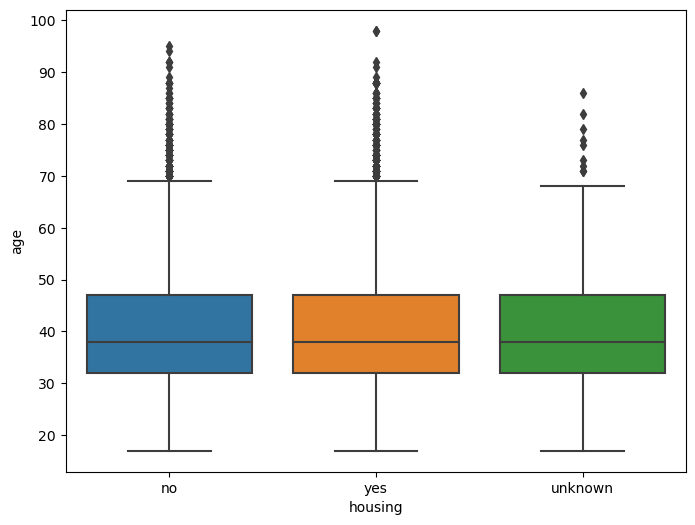

In [34]:
# Build a box plot for the "age" feature by the "housing values" with sns.boxplot function
sns.boxplot(x="housing", y="age", data=df)

In [35]:
# "Categorical Features" - Use 'Count Plot' for a visual interaction analysis between categorical features.
# Calculate and visualize the interaction between target and client marital status features.
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


<AxesSubplot:xlabel='marital', ylabel='count'>

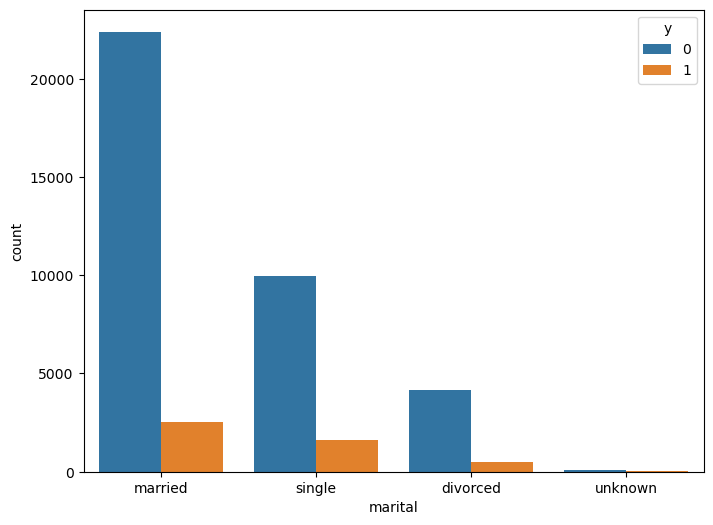

In [36]:
sns.countplot(x="marital", hue="y", data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

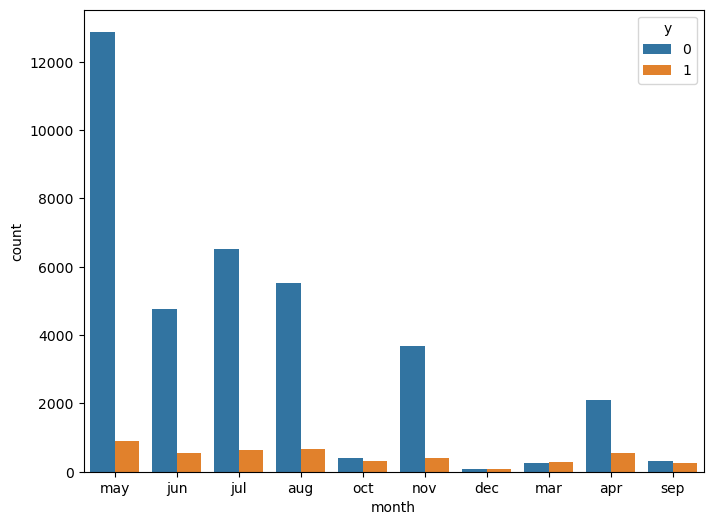

In [37]:
# Build the "Count Plot" for the 'month' feature by the 'y' feature target values with sns.countplot function
sns.countplot(x="month", hue="y", data=df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

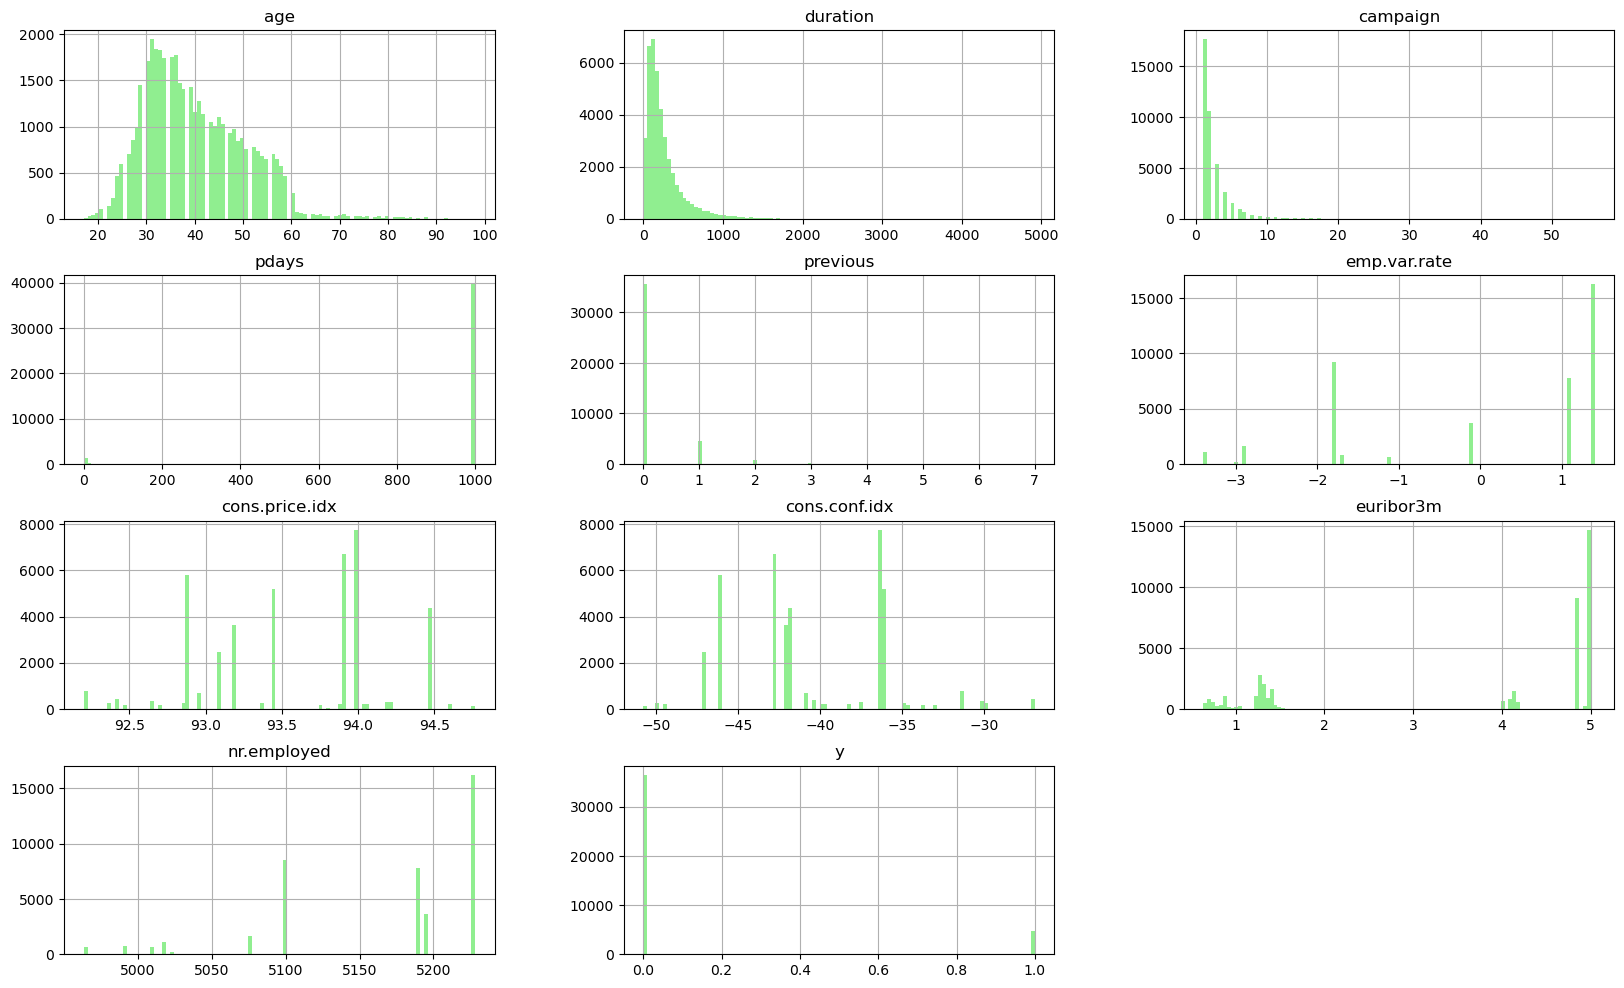

In [38]:
#Comprehensive Visual Analysis" of the source banking dataset
# Create the categorical and numerical lists for the correspondent dataset features.
# Draw the distribution of numerical features with 'hist' function.

categorical = []
numerical = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

df[numerical].hist(figsize=(20,12), bins=100, color='lightgreen')

In [ ]:
# From the "Histograms" above, we see that for each numerical feature there is one or more dominant segments of values​, that is why we got pronounced peaks.
# In addition, we see that the target feature is unbalanced. The number of positive outcomes is significantly lower than negative, which is quite natural for telephone marketing. 
# As a result, the problem arises with the fact that many methods are sensitive to the imbalance of features. We will try to solve this problem later.
# Next, let's look at the categorical features.

In [39]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


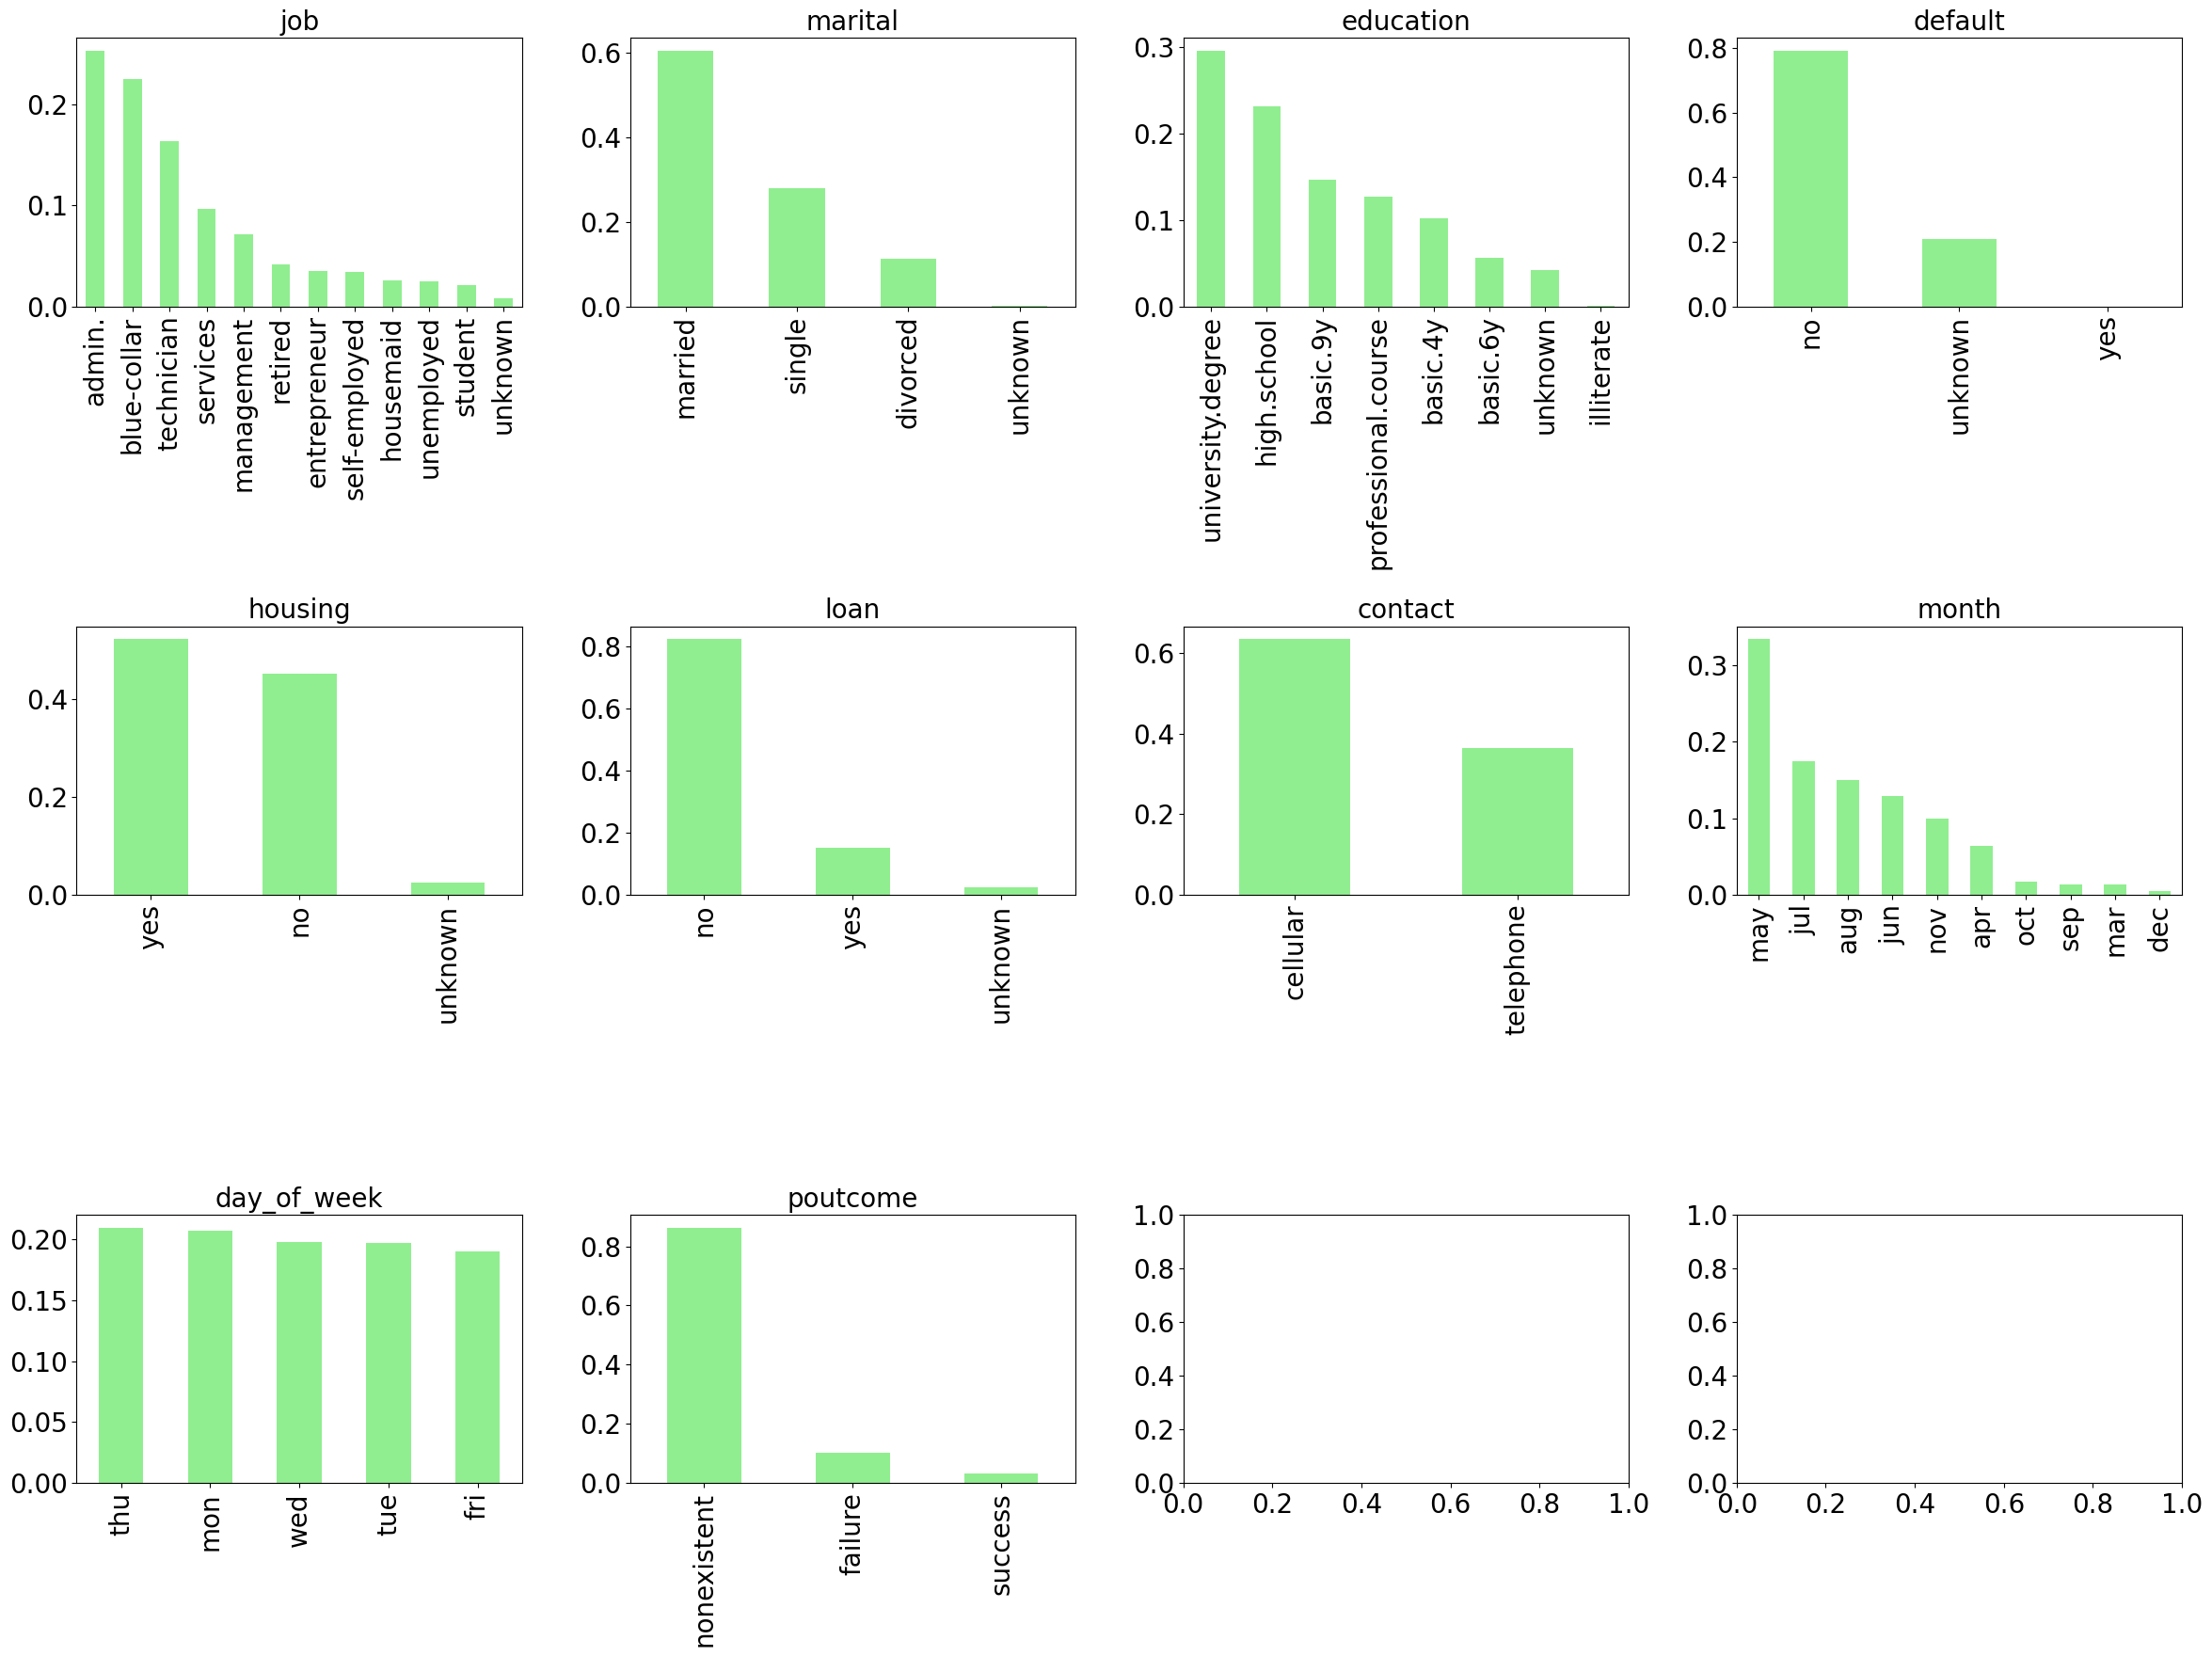

In [40]:
# Visualize the categorical features with bar plots.
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='lightgreen')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()

In [41]:
# Now look at the "Correlation Matrix" (for the numerical features).
correlation_table = df.corr()
correlation_table

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


<AxesSubplot:>

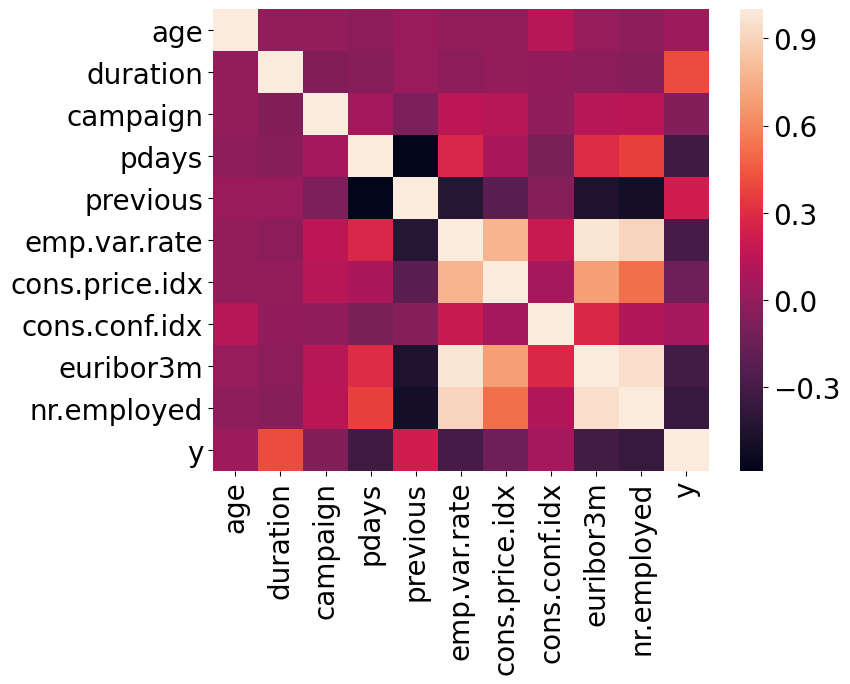

In [42]:
sns.heatmap(correlation_table)

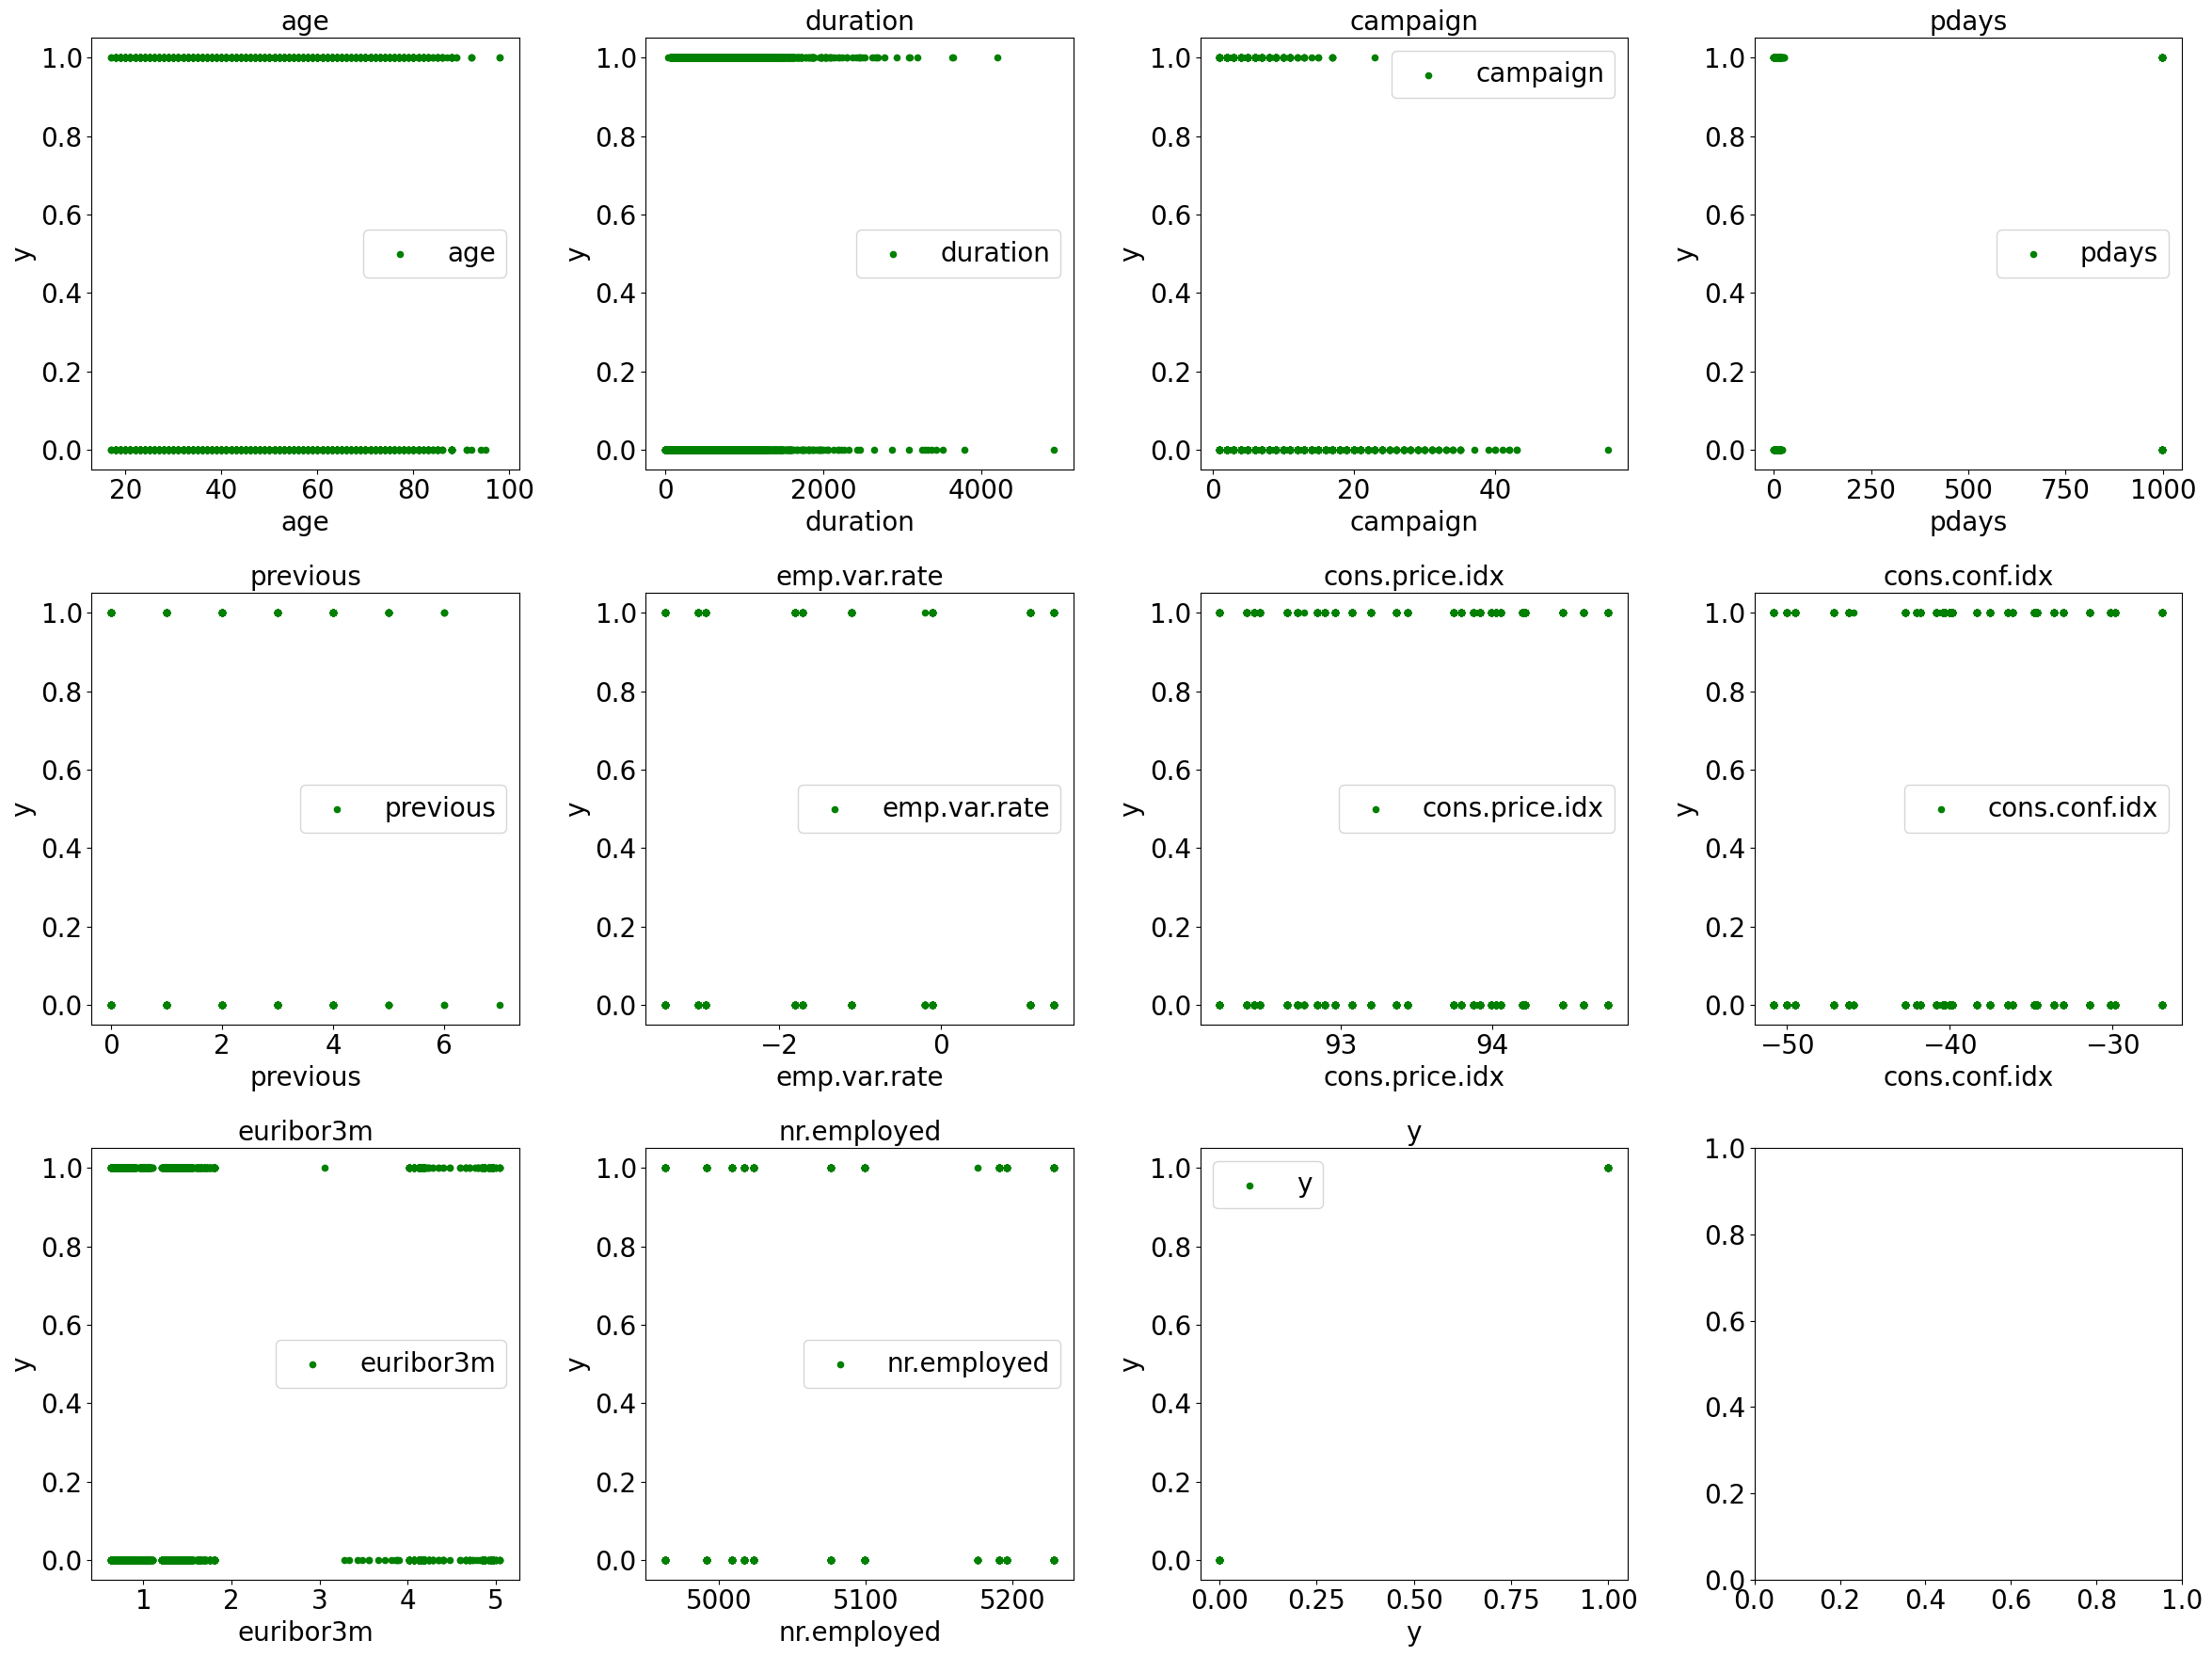

In [43]:
# Look at the visualized dependences of numerical features from the target feature with scatter plots.
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(numerical)):
    df.plot(x=numerical[i], y = 'y', label=numerical[i], ax=axes[i//4, i%4], kind='scatter', color='green')
    axes[i//4, i%4].set_title(numerical[i])
plt.tight_layout()

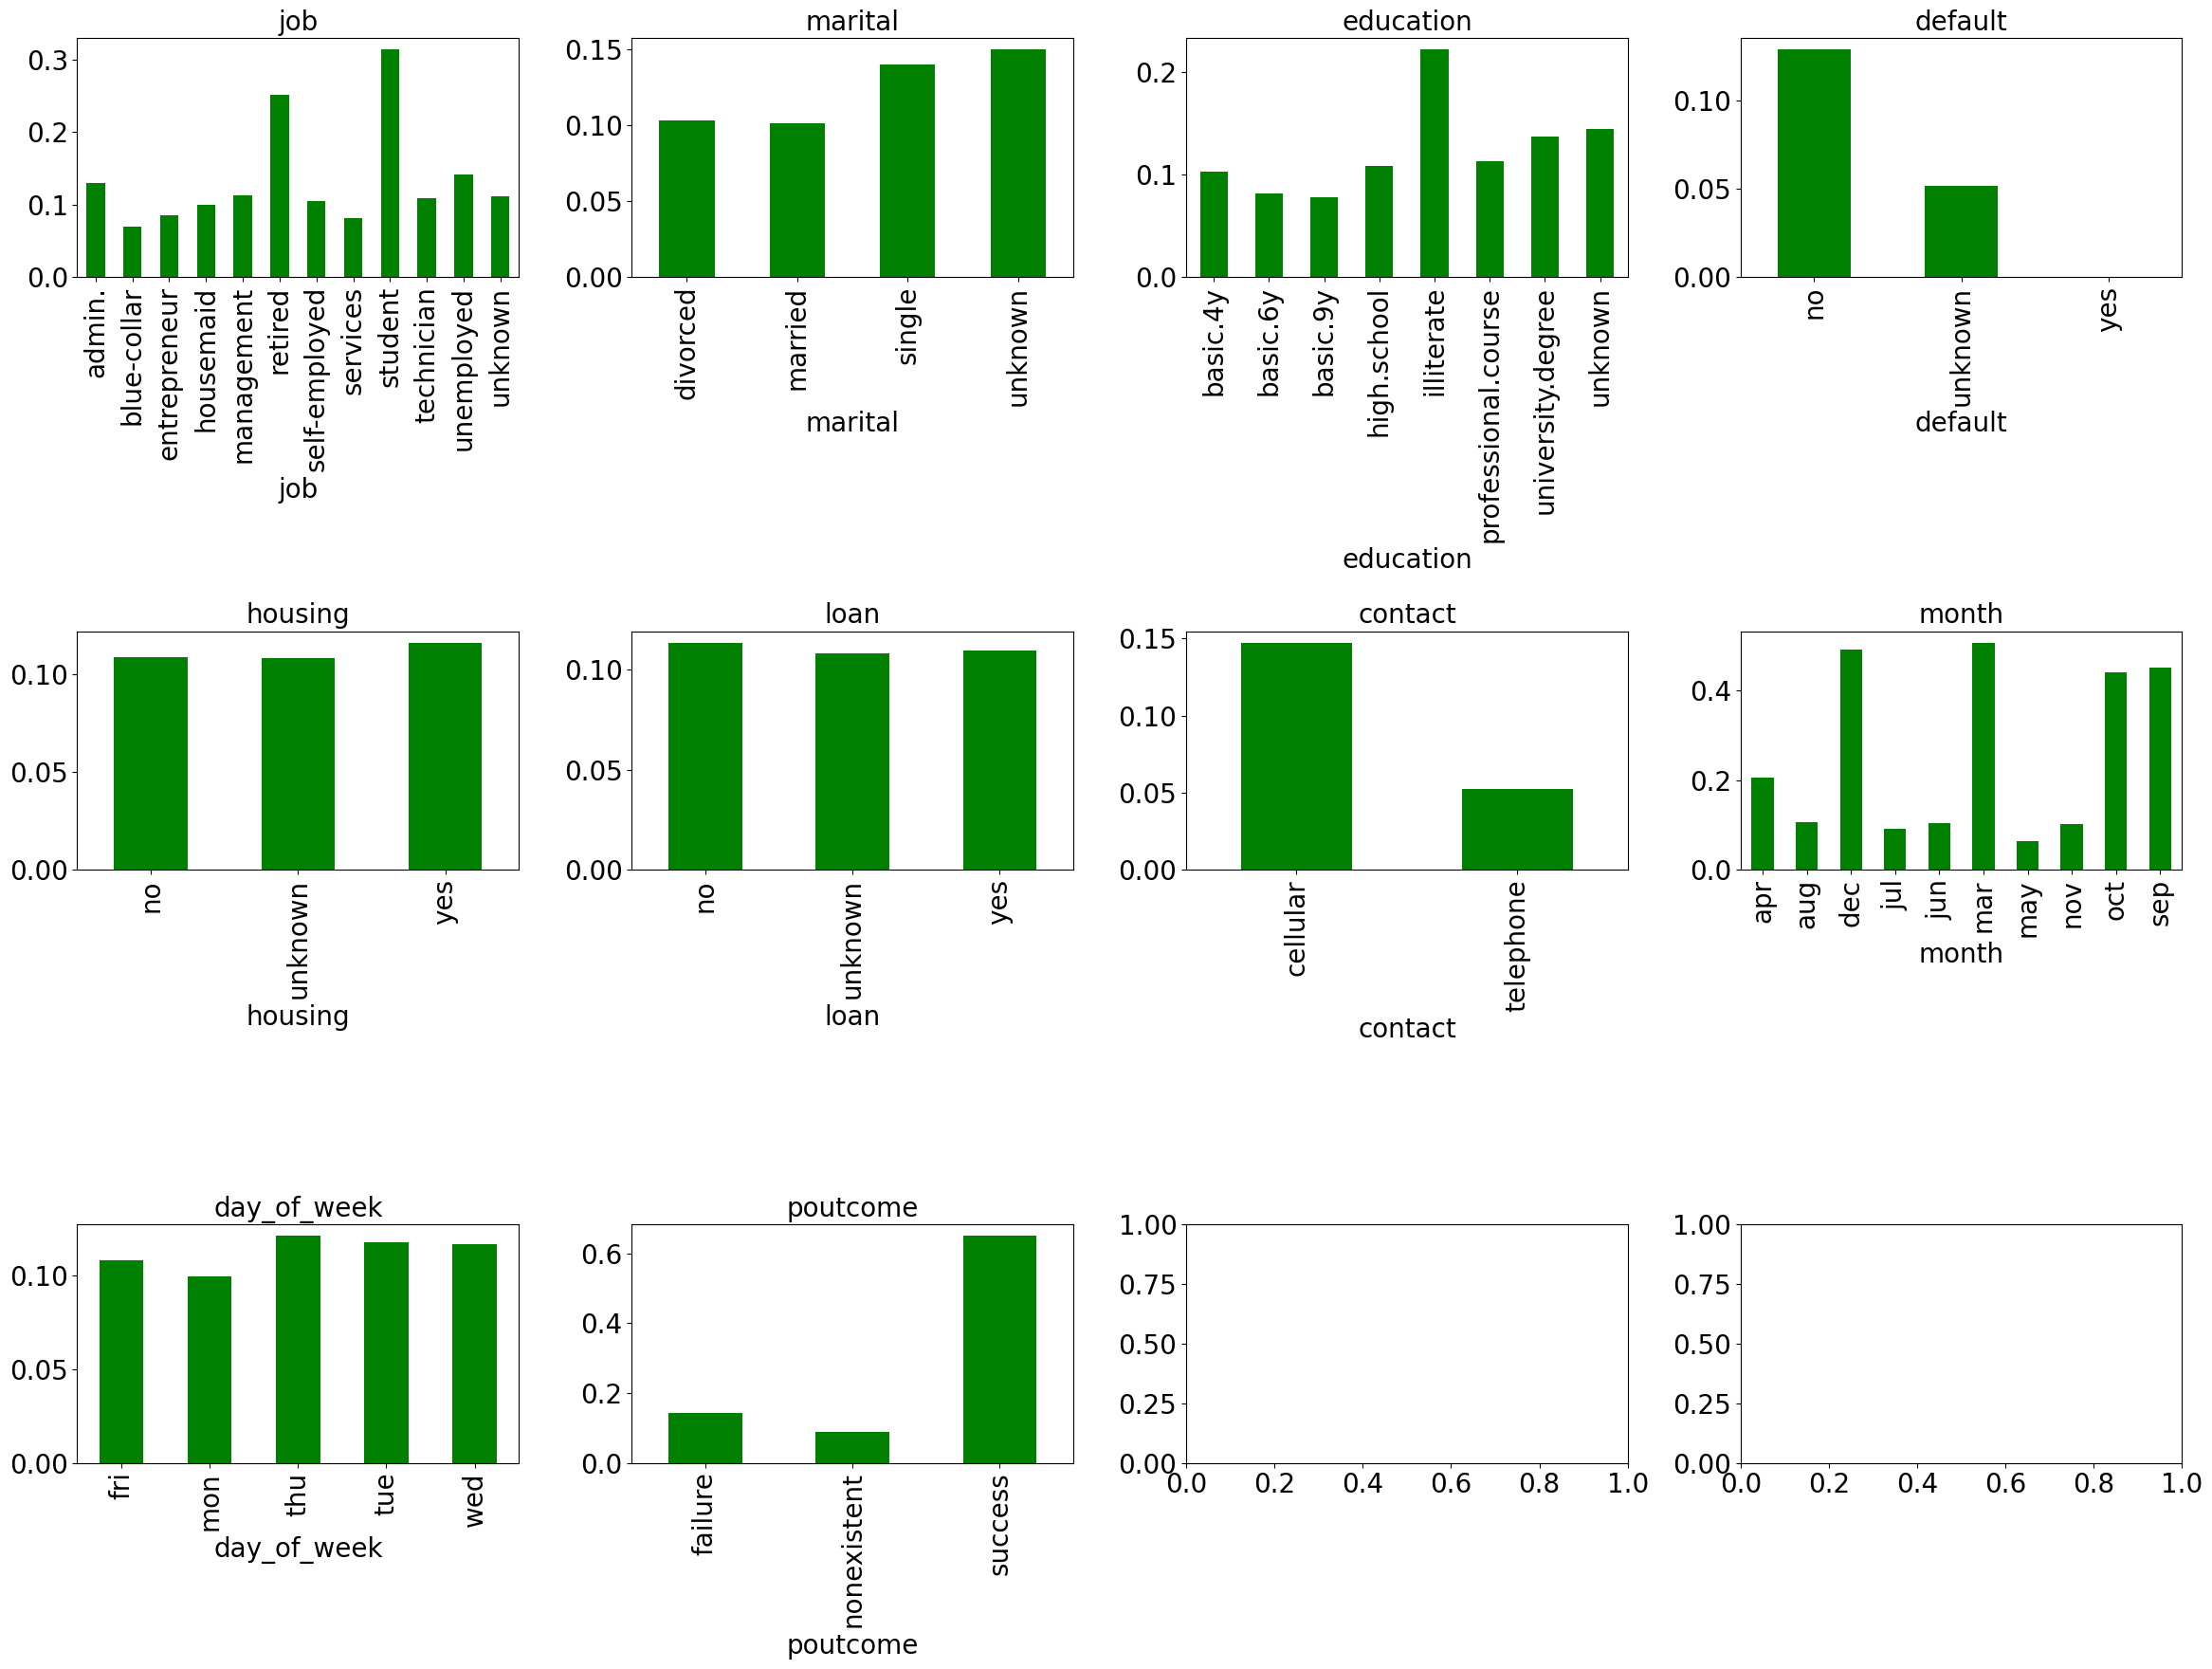

In [44]:
# We visualize the distribution of positive target responses by groups
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df.groupby(categorical[i])['y'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='green')
    axes[i//4, i%4].set_title(categorical[i])

plt.tight_layout()

In [ ]:
# SUMMARY #
# In such a form, plots are already more interesting. So we see, for many features, the chance of a positive response is significantly higher.
# We also see that "Housing", "Loan" and "day_of_week" features will hardly help us,
# because judging by the plots, the share of positive target responses hardly depends on them.